# Exploratory Data Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load full datasets
bottle_data = pd.read_csv('Datasets/194903-202105_Bottle.csv', encoding='latin1')
cast_data = pd.read_csv('Datasets/194903-202105_Cast.csv', encoding='latin1')

/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_17608/374561893.py:6: DtypeWarning: Columns (47,61) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle_data = pd.read_csv('Datasets/194903-202105_Bottle.csv', encoding='latin1')
/var/folders/bk/6zsdr_0d5tbb4ggk0ngc_l940000gn/T/ipykernel_17608/374561893.py:7: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast_data = pd.read_csv('Datasets/194903-202105_Cast.csv', encoding='latin1')


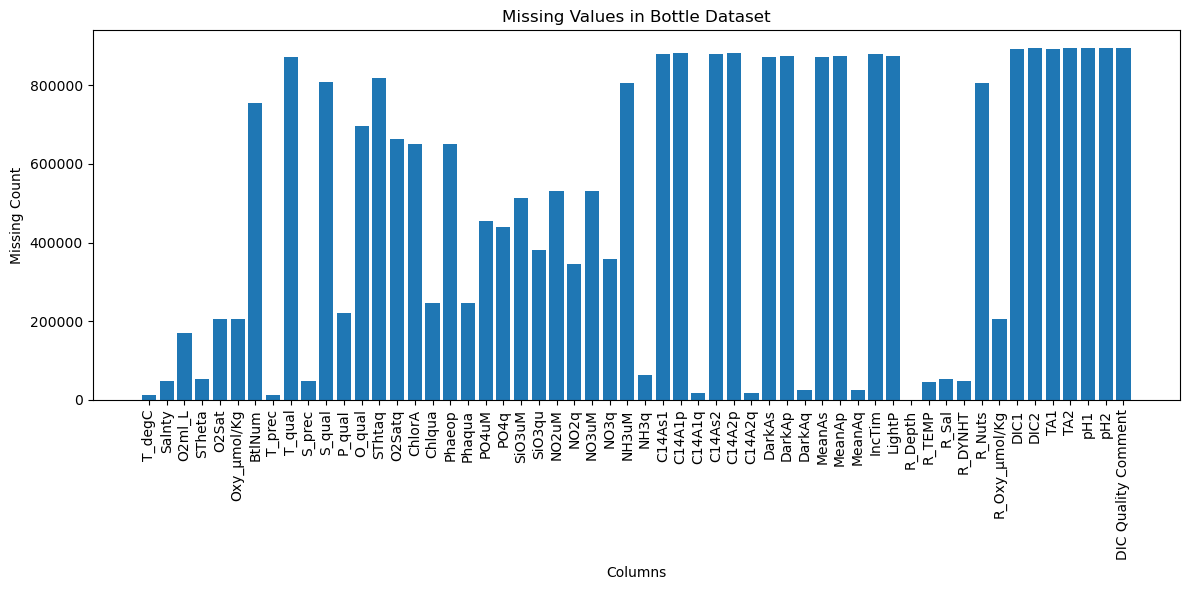

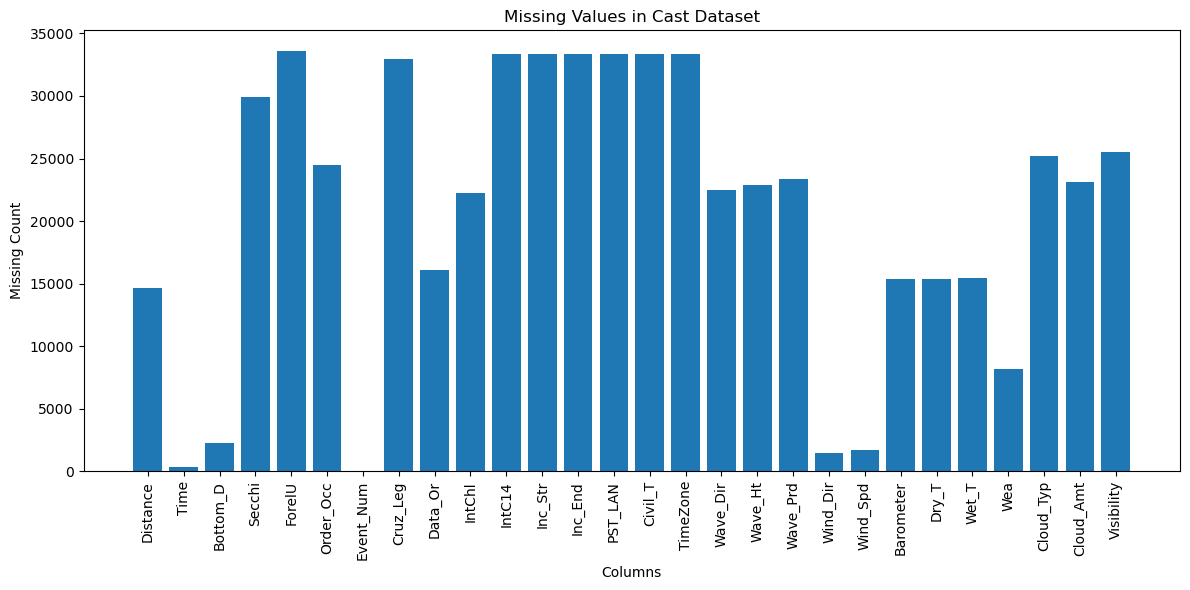

In [5]:
# Create tables of missing values for each dataset
bottle_missing = bottle_data.isnull().sum().reset_index()
bottle_missing.columns = ['Column', 'Missing Count']
bottle_missing = bottle_missing[bottle_missing['Missing Count'] > 0]

cast_missing = cast_data.isnull().sum().reset_index()
cast_missing.columns = ['Column', 'Missing Count']
cast_missing = cast_missing[cast_missing['Missing Count'] > 0]

# Plot bar graphs for missing values
plt.figure(figsize=(12, 6))
plt.bar(bottle_missing['Column'], bottle_missing['Missing Count'])
plt.title('Missing Values in Bottle Dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(cast_missing['Column'], cast_missing['Missing Count'])
plt.title('Missing Values in Cast Dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Function to create distribution plots for all columns in a dataset
def plot_all_distributions(data, title):
    numeric_columns = data.select_dtypes(include=['number']).columns
    num_vars = len(numeric_columns)
    num_cols = 5
    num_rows = -(-num_vars // num_cols)  # Ceiling division to get number of rows

    plt.figure(figsize=(20, 5 * num_rows))
    for i, var in enumerate(numeric_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(data[var].dropna(), kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to include suptitle
    plt.show()

# Plot distributions for all numeric columns in both datasets
plot_all_distributions(bottle_data, 'Distribution Plots for All Numeric Variables in Bottle Dataset')
plot_all_distributions(cast_data, 'Distribution Plots for All Numeric Variables in Cast Dataset')

In [ ]:
# Function to create a correlation matrix heatmap for a dataset without text annotations
def plot_correlation_matrix_no_text(data, title):
    numeric_columns = data.select_dtypes(include=['number']).columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[numeric_columns].corr(), annot=False, cmap='coolwarm', vmin=1, vmax=-1)
    plt.title(title)
    plt.show()

# Plot correlation matrices for both datasets without number text
plot_correlation_matrix_no_text(bottle_data, 'Correlation Matrix of All Numeric Variables in Bottle Dataset')
plot_correlation_matrix_no_text(cast_data, 'Correlation Matrix of All Numeric Variables in Cast Dataset')

In [ ]:
# Summary statistics

# Print summary statistics for all numeric columns in the Bottle dataset
print("Summary Statistics for Bottle Dataset:")
print(bottle_data.describe())

# Print a separator for clarity
print("\n" + "-"*50 + "\n")

# Print summary statistics for all numeric columns in the Cast dataset
print("Summary Statistics for Cast Dataset:")
print(cast_data.describe())